# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from matplotlib import pyplot as plt

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [57]:

#cities_test = ["Paris", "London", "Gretel", "Beijing"]
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
name = []
i = 0

# Loop through the list of cities and perform a request for data on each
# for city in cities:
#     response = requests.get(query_url + city).json()
#     if i % 50 == 0:
#         time.sleep(5)

#     try: 
#         lat.append(response['coord']['lat'])
#         lng.append(response['coord']['lon'])
#         temp.append(response['main']['temp'])
#         max_temp.append(response['main']['temp_max'])
#         humidity.append(response['main']['humidity'])
#         cloudiness.append(response['clouds']['all'])
#         wind_speed.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])
#         name.append(response['name'])
#         i = i + 1
#         print(f"recorded {i}: {city}")
        
#     except KeyError: 
#         print(f"{city} city not found")


#print(response)

#print(f"The latitude is: {lat}")
#print(f"The lon is: {lng}") 
#print(f"The temp is: {temp}") 
#print(f"The max temp is: {max_temp}")
#print(f"The humidity is: {humidity}")
#print(f"The cloudiness is: {cloudiness}")
#print(f"The wind speed is: {wind_speed}")
#print(f"The country is: {country}")
#print(f"The date is: {date}")

recorded 1: kapaa
recorded 2: okhotsk
recorded 3: hambantota
recorded 4: arraial do cabo
recorded 5: qeshm
recorded 6: ghanzi
recorded 7: tuktoyaktuk
recorded 8: sumbe
recorded 9: vaini
recorded 10: ribeira grande
recorded 11: nha trang
recorded 12: yellowknife
recorded 13: torbay
recorded 14: kalianget
recorded 15: chuy
recorded 16: mar del plata
recorded 17: coquimbo
recorded 18: khatanga
recorded 19: ushuaia
recorded 20: mataura
recorded 21: nikolskoye
recorded 22: dikson
recorded 23: sao jose da coroa grande
recorded 24: tuatapere
recorded 25: hobart
recorded 26: muros
recorded 27: kibala
recorded 28: sampit
taolanaro city not found
recorded 29: talnakh
recorded 30: punta arenas
recorded 31: rikitea
recorded 32: krasnyy chikoy
recorded 33: berlevag
recorded 34: tulun
recorded 35: polyarnyy
recorded 36: hermanus
recorded 37: puerto ayora
recorded 38: butaritari
recorded 39: albany
recorded 40: bluff
recorded 41: yerkoy
recorded 42: darbhanga
recorded 43: jinchang
recorded 44: lazaro

recorded 333: hoshangabad
recorded 334: aklavik
lolua city not found
recorded 335: nanakuli
recorded 336: yenagoa
recorded 337: sakakah
recorded 338: sao filipe
recorded 339: natal
recorded 340: sucua
samusu city not found
recorded 341: manaure
taburi city not found
recorded 342: naze
recorded 343: evensk
recorded 344: alenquer
recorded 345: mayo
recorded 346: santiago del estero
recorded 347: banamba
recorded 348: aquidauana
recorded 349: viransehir
recorded 350: tiksi
recorded 351: wilmington
recorded 352: tura
recorded 353: tanout
recorded 354: belyy yar
recorded 355: castro daire
recorded 356: yar-sale
khonuu city not found
recorded 357: kavaratti
higuey city not found
recorded 358: antofagasta
recorded 359: kununurra
recorded 360: fort nelson
recorded 361: rawson
recorded 362: canoinhas
recorded 363: lavrentiya
recorded 364: westport
mys shmidta city not found
recorded 365: pelym
recorded 366: collie
recorded 367: kavieng
recorded 368: isangel
recorded 369: bingol
recorded 370: tr

In [41]:
d = datetime.utcfromtimestamp(1602900138)

print(d)

2020-10-17 02:02:18


## Convert Raw Data to DataFrame
* Save as csv

In [83]:
weather_data_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})
#weather_data_df["Date"] = weather_data_df(datetime.utcfromtimestamp["Date"])

                                      
weather_data_df.to_csv(output_data_file, index=False)
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,82.40,74,1,12.75,US,1602901251
1,Okhotsk,59.38,143.30,27.88,80,0,10.94,RU,1602901256
2,Hambantota,6.12,81.12,75.20,94,40,4.70,LK,1602901256
3,Arraial do Cabo,-22.97,-42.03,69.76,74,100,5.91,BR,1602901257
4,Qeshm,26.96,56.27,68.00,18,0,9.17,IR,1602901257


In [84]:
#re-add date as CSV file 
file = "../output_data/cities.csv"

cities_df = pd.read_csv(file)
cities_df.head()



,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,82.40,74,1,12.75,US,1602901251
1,Okhotsk,59.38,143.30,27.88,80,0,10.94,RU,1602901256
2,Hambantota,6.12,81.12,75.20,94,40,4.70,LK,1602901256
3,Arraial do Cabo,-22.97,-42.03,69.76,74,100,5.91,BR,1602901257
4,Qeshm,26.96,56.27,68.00,18,0,9.17,IR,1602901257


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

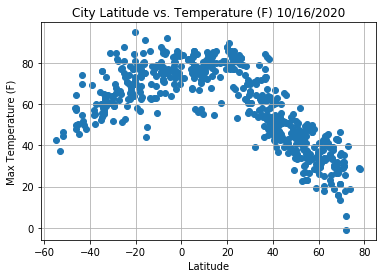

<Figure size 432x288 with 0 Axes>

In [85]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Temperature (F) 10/16/2020")
plt.grid()

plt.show()
plt.savefig('../output_data/lat_temp.png')

### Latitude vs. Humidity Plot

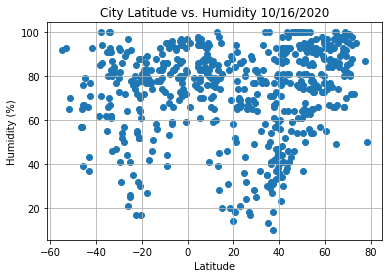

<Figure size 432x288 with 0 Axes>

In [88]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 10/16/2020")
plt.grid()

plt.show()
plt.savefig('../output_data/humidity.png')

### Latitude vs. Cloudiness Plot

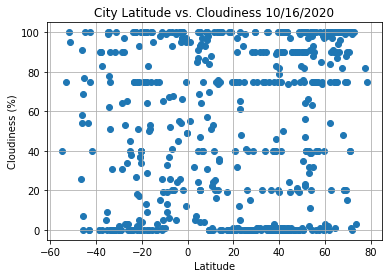

<Figure size 432x288 with 0 Axes>

In [89]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 10/16/2020")
plt.grid()

plt.show()
plt.savefig('../output_data/cloudiness.png')

### Latitude vs. Wind Speed Plot

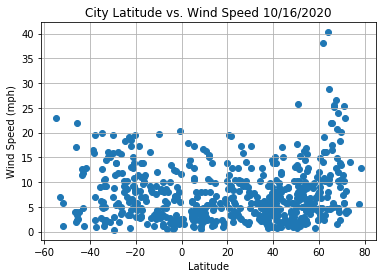

<Figure size 432x288 with 0 Axes>

In [90]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 10/16/2020")
plt.grid()

plt.show()
plt.savefig('../output_data/wind_speed.png')

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
#x_values = (cities_df[])
#y_values = (cities_df[])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# plt.xlabel("")
# plt.ylabel("")
# plt.title("")

plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8804587166609207


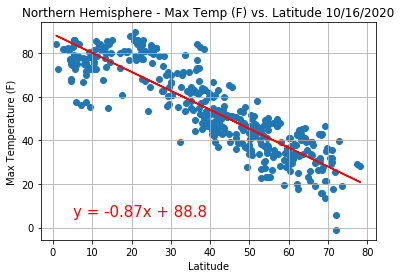

<Figure size 432x288 with 0 Axes>

In [158]:
north_lat = cities_df.loc[(cities_df['Latitude'] > 0)]
#north_lat.head()


x_values = (north_lat["Latitude"])
y_values = (north_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude 10/16/2020")

plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('../output_data/north_lat_temp.png')


###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.655480345844131


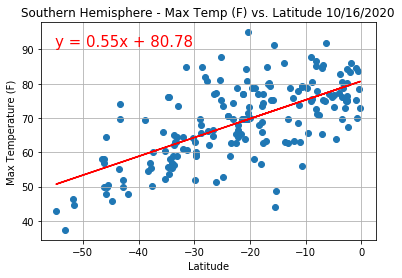

<Figure size 432x288 with 0 Axes>

In [159]:
south_lat = cities_df.loc[(cities_df['Latitude'] < 0)]
#south_lat.head()


x_values = (south_lat["Latitude"])
y_values = (south_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,91),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude 10/16/2020")

plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('../output_data/south_lat_temp.png')


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.18083274043962722


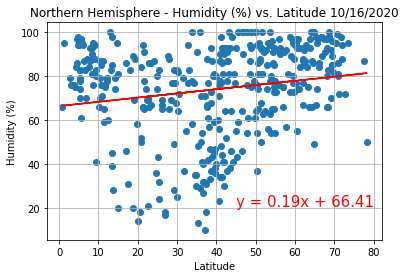

<Figure size 432x288 with 0 Axes>

In [160]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude 10/16/2020")

plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('../output_data/north_humidity.png')


###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.181629945939095


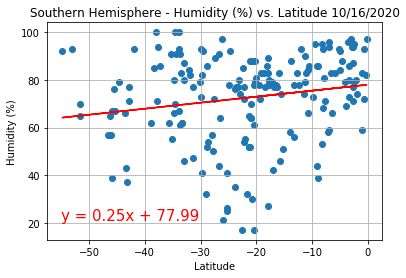

<Figure size 432x288 with 0 Axes>

In [161]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude 10/16/2020")

plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('../output_data/south_humidity.png')


###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.2024695498959369


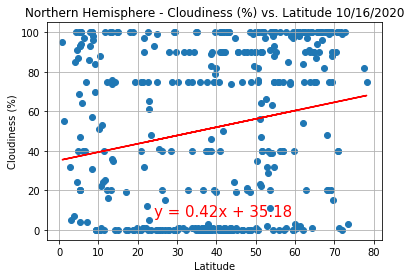

<Figure size 432x288 with 0 Axes>

In [162]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(24,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude 10/16/2020")

plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('../output_data/north_cloudiness.png')


###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

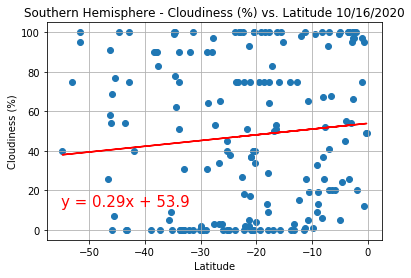

The r value is: 0.09947132191060931


<Figure size 432x288 with 0 Axes>

In [145]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude 10/16/2020")

plt.grid()
plt.show()
plt.savefig('../output_data/south_cloudiness.png')
print(f"The r value is: {rvalue}")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

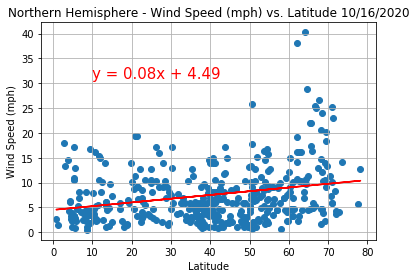

The r value is: 0.2607848580354551


<Figure size 432x288 with 0 Axes>

In [152]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,31),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude 10/16/2020")

plt.grid()
plt.show()
plt.savefig('../output_data/north_wind.png')
print(f"The r value is: {rvalue}")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

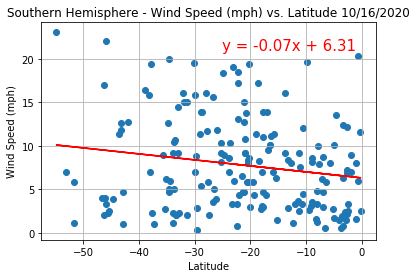

The r value is: -0.1727719537592928


<Figure size 432x288 with 0 Axes>

In [157]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-25,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude 10/16/2020")

plt.grid()
plt.show()
plt.savefig('../output_data/south_wind.png')
print(f"The r value is: {rvalue}")